# SME0829 Aprendizado de Máquina


por **Cibele Russo**

**ICMC/USP - São Carlos SP**



## Exemplo Árvore de decisão



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import random

random.seed(1)

# Considere os dados de comorbidades em pacientes internados por COVID no estado de São Paulo em 2021:

# Carregando os dados
dados = pd.read_csv('https://raw.githubusercontent.com/predict-icmc/covid19/master/leitura-dados/ae.csv')
dados.head(14)


,Unnamed: 0,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down,idade,obito,FEMININO,IGNORADO,INDEFINIDO,MASCULINO
0,371454,0,0,0,0,0,0,0,0,0,1,0,0,0,76.0,1,0,0,0,1
1,2441254,0,0,0,0,0,1,0,0,0,0,0,0,0,86.0,1,1,0,0,0
2,2926915,0,0,0,0,0,0,0,0,0,0,0,0,0,42.0,1,0,0,0,1
3,2510490,0,1,1,0,0,0,0,0,0,1,0,0,0,73.0,1,1,0,0,0
4,791890,0,1,1,0,0,0,1,0,0,1,0,0,0,75.0,1,0,0,0,1
5,3051449,0,1,1,0,0,0,0,0,0,0,0,0,0,82.0,1,0,0,0,1
6,3181081,0,0,0,0,0,0,0,0,0,0,0,0,0,86.0,1,0,0,0,1
7,212035,0,0,0,0,1,0,0,0,0,1,0,0,0,37.0,1,0,0,0,1
8,461771,0,1,1,0,0,0,0,0,0,0,0,0,0,68.0,1,0,0,0,1
9,3995152,0,0,0,0,0,0,0,0,0,0,0,0,0,80.0,1,1,0,0,0


In [2]:
dados = dados.drop('Unnamed: 0', axis=1)
dados

,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down,idade,obito,FEMININO,IGNORADO,INDEFINIDO,MASCULINO
0,0,0,0,0,0,0,0,0,0,1,0,0,0,76.0,1,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,0,0,0,86.0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,42.0,1,0,0,0,1
3,0,1,1,0,0,0,0,0,0,1,0,0,0,73.0,1,1,0,0,0
4,0,1,1,0,0,0,1,0,0,1,0,0,0,75.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,0,0,0,35.0,0,0,0,0,1
29996,0,0,0,0,0,0,0,0,0,0,0,0,0,45.0,0,1,0,0,0
29997,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,1
29998,0,0,0,0,0,0,0,0,0,0,0,0,0,27.0,0,1,0,0,0


In [3]:
pd.crosstab(dados['obito'],columns='Total')

col_0,Total
obito,
0,21000
1,9000


In [4]:
# Separa as preditoras (X) e a resposta (y)
X = dados.drop('obito', axis=1)
y = dados['obito']

In [5]:
# dados de treinamento e teste: 80% para treinamento e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Cria uma árvore de decisão
arvore = DecisionTreeClassifier(max_depth=3)

# Treina a árvore de decisão usando os dados de treinamento
arvore.fit(X_train, y_train)

# Usa a árvore de decisão para prever os rótulos da base de teste
y_pred = arvore.predict(X_test)


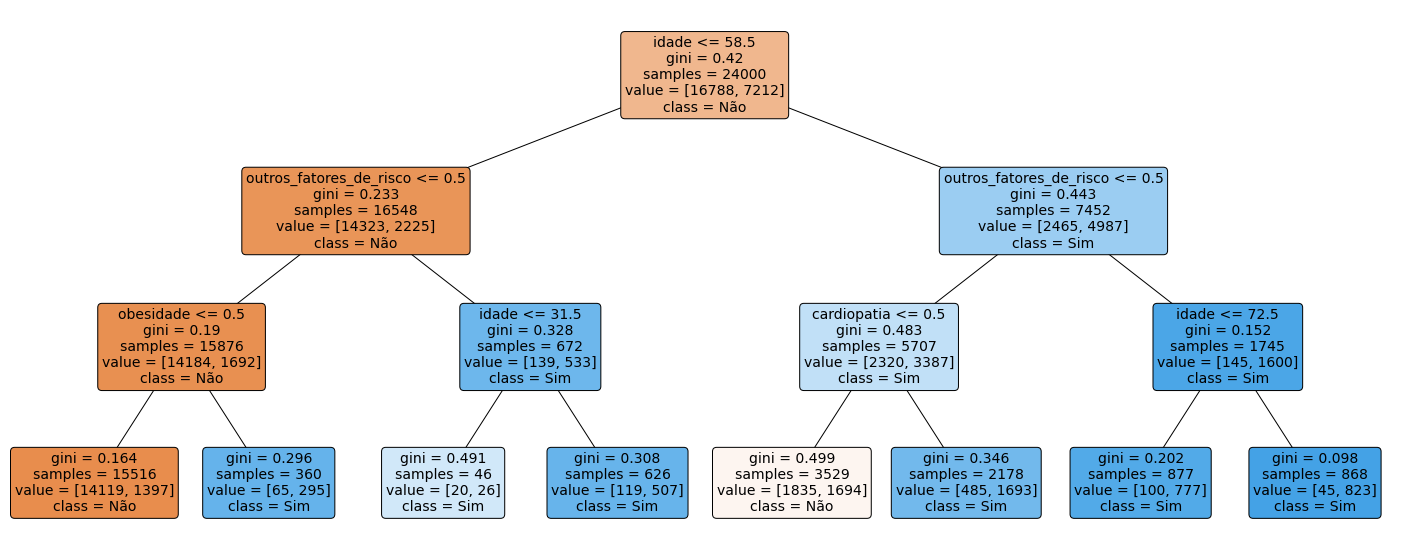

In [7]:
plt.figure(figsize=(25,10))
a = plot_tree(arvore, 
              feature_names=['asma','cardiopatia','diabetes','doenca_hematologica','doenca_hepatica','doenca_neurologica','doenca_renal','imunodepressao','obesidade','outros_fatores_de_risco','pneumopatia','puerpera','sindrome_de_down','idade','obito','FEMININO','IGNORADO','INDEFINIDO','MASCULINO'],
              class_names=['Não', 'Sim'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Acurácia
acc = accuracy_score(y_test, y_pred)

print('Métricas de desempenho para aprendizado supervisionado em classificação binária')
print("\nAcurácia:", np.round(acc,3))

# Para a classe 1
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print("\nPrecisão (para a classe 1):", np.round(precision,3))
print("Recall (para a classe 1):", np.round(recall,3))
print("F1-score (para a classe 1):", np.round(f1,3))

# Para a classe 0
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)
print("\nPrecisão (para a classe 0):", np.round(precision,3))
print("Recall (para a classe 0):", np.round(recall,3))
print("F1-score (para a classe 0):", np.round(f1,3))

Métricas de desempenho para aprendizado supervisionado em classificação binária

Acurácia: 0.837

Precisão (para a classe 1): 0.819
Recall (para a classe 1): 0.58
F1-score (para a classe 1): 0.679

Precisão (para a classe 0): 0.841
Recall (para a classe 0): 0.946
F1-score (para a classe 0): 0.89


In [9]:
from sklearn.model_selection import GridSearchCV

# Uso da validação cruzada para encontar a melhor árvore
param_grid = {
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 6)
}

# Realiza a busca em grid com cross-validation para encontrar a melhor árvore
grid = GridSearchCV(arvore, param_grid, cv=10)
grid.fit(X_train, y_train)

# Usa a árvore de decisão para prever os rótulos da base de teste
y_pred = grid.predict(X_test)

# Melhor árvore escolhida
print(f"Melhores parâmetros: {grid.best_params_}")
print(f"Acurácia da melhor árvore: {grid.best_score_}")

Melhores parâmetros: {'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 4}
Acurácia da melhor árvore: 0.8590416666666666


In [10]:
# Acurácia
acc = accuracy_score(y_test, y_pred)

print('Métricas de desempenho para aprendizado supervisionado em classificação binária')
print("\nAcurácia:", np.round(acc,3))

# Para a classe 1
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print("\nPrecisão (para a classe 1):", np.round(precision,3))
print("Recall (para a classe 1):", np.round(recall,3))
print("F1-score (para a classe 1):", np.round(f1,3))

# Para a classe 0
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)
print("\nPrecisão (para a classe 0):", np.round(precision,3))
print("Recall (para a classe 0):", np.round(recall,3))
print("F1-score (para a classe 0):", np.round(f1,3))

Métricas de desempenho para aprendizado supervisionado em classificação binária

Acurácia: 0.859

Precisão (para a classe 1): 0.782
Recall (para a classe 1): 0.729
F1-score (para a classe 1): 0.755

Precisão (para a classe 0): 0.888
Recall (para a classe 0): 0.914
F1-score (para a classe 0): 0.901


# Exemplo Bagging

In [11]:
from sklearn.ensemble import BaggingClassifier

# Inicializa o classificador por árvore de decisão
tree = DecisionTreeClassifier()

# Inicializa o classificador por Bagging 
bagging = BaggingClassifier(base_estimator=tree, n_estimators=20, random_state=42)

# Ajusta o classificador por Bagging aos dados de treinamento
bagging.fit(X_train, y_train)

# Prediz a resposta para a base de teste
y_pred = bagging.predict(X_test)

# Avalia a performance do classificador por Bagging nos dados de teste 
score = bagging.score(X_test, y_test)



print('Métricas de desempenho para aprendizado supervisionado em classificação binária')
print("\nAcurácia:", np.round(score,3))

# Para a classe 1
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print("\nPrecisão (para a classe 1):", np.round(precision,3))
print("Recall (para a classe 1):", np.round(recall,3))
print("F1-score (para a classe 1):", np.round(f1,3))

# Para a classe 0
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)
print("\nPrecisão (para a classe 0):", np.round(precision,3))
print("Recall (para a classe 0):", np.round(recall,3))
print("F1-score (para a classe 0):", np.round(f1,3))

Métricas de desempenho para aprendizado supervisionado em classificação binária

Acurácia: 0.852

Precisão (para a classe 1): 0.787
Recall (para a classe 1): 0.691
F1-score (para a classe 1): 0.736

Precisão (para a classe 0): 0.875
Recall (para a classe 0): 0.921
F1-score (para a classe 0): 0.897


# Exemplo Boosting

In [12]:
from sklearn.ensemble import AdaBoostClassifier

# Inicializa o classificador por árvore de decisão
tree = DecisionTreeClassifier(max_depth=3)

# Inicializa o classificador AdaBoost
adaboost = AdaBoostClassifier(base_estimator=tree, n_estimators=50, learning_rate=1, random_state=42)

# Ajusta o classificador AdaBoost aos dados de treinamento
adaboost.fit(X_train, y_train)

# Prediz para a base de teste
y_pred = adaboost.predict(X_test)

# Avalia a performance do classificador AdaBoost nos dados de teste 
score = adaboost.score(X_test, y_test)



print('Métricas de desempenho para aprendizado supervisionado em classificação binária')
print("\nAcurácia:", np.round(score,3))

# Para a classe 1
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print("\nPrecisão (para a classe 1):", np.round(precision,3))
print("Recall (para a classe 1):", np.round(recall,3))
print("F1-score (para a classe 1):", np.round(f1,3))

# Para a classe 0
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)
print("\nPrecisão (para a classe 0):", np.round(precision,3))
print("Recall (para a classe 0):", np.round(recall,3))
print("F1-score (para a classe 0):", np.round(f1,3))

Métricas de desempenho para aprendizado supervisionado em classificação binária

Acurácia: 0.862

Precisão (para a classe 1): 0.804
Recall (para a classe 1): 0.707
F1-score (para a classe 1): 0.753

Precisão (para a classe 0): 0.882
Recall (para a classe 0): 0.927
F1-score (para a classe 0): 0.904


# Exemplo Florestas aleatórias


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Ajusta um classificador por florestas aleatórias
clf = RandomForestClassifier(n_estimators=200, random_state=10)
clf.fit(X_train, y_train)

# Obtém predições para a base de teste
y_pred = clf.predict(X_test)

# Avalia a performance do classificador por florestas aleatórias nos dados de teste 
acc = accuracy_score(y_test, y_pred)



print('Métricas de desempenho para aprendizado supervisionado em classificação binária')
print("\nAcurácia:", np.round(acc,3))

# Para a classe 1
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print("\nPrecisão (para a classe 1):", np.round(precision,3))
print("Recall (para a classe 1):", np.round(recall,3))
print("F1-score (para a classe 1):", np.round(f1,3))

# Para a classe 0
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)
print("\nPrecisão (para a classe 0):", np.round(precision,3))
print("Recall (para a classe 0):", np.round(recall,3))
print("F1-score (para a classe 0):", np.round(f1,3))

Métricas de desempenho para aprendizado supervisionado em classificação binária

Acurácia: 0.855

Precisão (para a classe 1): 0.789
Recall (para a classe 1): 0.702
F1-score (para a classe 1): 0.743

Precisão (para a classe 0): 0.879
Recall (para a classe 0): 0.92
F1-score (para a classe 0): 0.899
